# Final Project - MNIST Classifier

### Import Libraries

In [356]:
import torch.nn
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

### Download training and testing data

In [357]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5), (0.5))])

# Download torchvisioni datasets into respective folders
trainset = torchvision.datasets.MNIST('./train_set', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('./test_set', download=True, train=False, transform=transform)

# Use 64 unique images for each dataload
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

### Create dataloaders and visualize some examples

torch.Size([64, 1, 28, 28])
torch.Size([64])


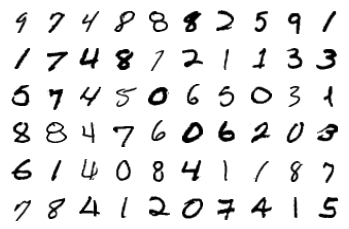

In [358]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

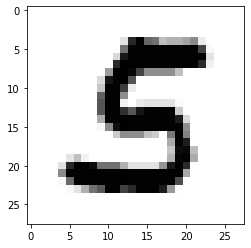

In [359]:
plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

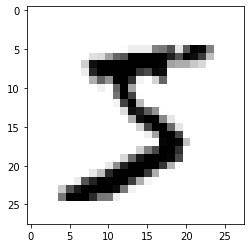

In [360]:
plt.imshow(trainset[0][0][0], cmap='gray_r')

### Model Initialization

In [361]:
# nn.Sequential is a type of nn.Module that allows for defining the nn in a sequential fashion
class Digit_Classifier(nn.Sequential):
  def __init__(self):
    super().__init__(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10))

In [362]:
#Instantiate the model:
model = Digit_Classifier()

### Hyperparameters Tuning

In [368]:
#hyperparameters: currently all are set to 1, it is up to you to figure out what they should be
#Don't just randomly change the hyperparameters: consider what each of them are changing (look in the code to find where the actually affect things)
num_epochs = 3
lr = learning_rate = 0.001
criterion = nn.CrossEntropyLoss() #consider using other loss functions: https://pytorch.org/docs/stable/nn.html#loss-functions
# Using Adam model which is still a stochastic gradient descent like SDG but reacts faster.
# Adam is faster to converge. SGD is slower but generalizes better.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

### Model Training

In [369]:
running_loss = []

#Training loop
model.train()
for i in range(num_epochs):
  for images, labels in trainloader:
    #zero out the gradients
    optimizer.zero_grad()

    #Calculate the output
    output = model(images)

    #Calculate the loss of the output, note: labels are the ACTUAL image labels, whereas output are your models guesses
    loss = criterion(output, labels)
    running_loss.append(loss.item())

    #Backpropagation (this is the part where we take the gradients [multivariable derivatives] of all the weights)
    loss.backward()

    #This is the part where we actually update the weights: how is learning_rate related to this step?
    optimizer.step()

### Save the model

In [370]:
#Save your model weights (this will generate a file that you will have to submit to us)
torch.save(model.state_dict(), 'model/weights.pth')

### Evaluate Test Accuracy

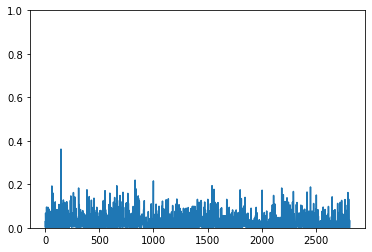

tensor([10.4598, 15.5426, 19.5881, 12.6462, 20.2137, 15.0607, 10.1120, 12.6805,
        10.8155, 10.5075, 17.1584,  8.9628, 12.0976, 11.5862, 12.0458, 18.1124])

tensor([1, 3, 5, 0, 5, 2, 9, 8, 3, 1, 3, 7, 0, 5, 4, 6])

tensor([[ -7.8447,  10.4598,  -2.3643, -11.9006,  -0.5459,  -8.8690,  -3.7259,
          -2.9234,  -3.6015,  -6.0579],
        [-16.8658,  -3.0197,  -5.3135,  15.5426, -12.1837,   1.4784, -14.6042,
          -2.7754,  -3.6232,  -0.9762],
        [-12.8529, -20.4637, -21.7784,  -4.5908, -14.8971,  19.5881,  -3.4331,
         -16.4658,   6.4140,  -1.5859],
        [ 12.6462,  -6.8066,  -5.0687,  -3.9662,  -5.3429,  -9.3203,  -1.6727,
          -3.3267,  -9.7124,  -0.2692],
        [-13.8291, -16.6560, -16.0190,   2.5039, -13.4707,  20.2137,  -7.4640,
         -11.9871,  -5.8564,   5.0350],
        [ -9.7585, -12.8658,  15.0607,  -7.4391,  -6.8639, -21.5617,  -9.3628,
           2.0690,  -8.0966, -13.3534],
        [ -9.5328, -10.2396,  -7.0932,  -3.3980,  -0.0810,  -8.5862, -11.7130,
           0.9639,  -5.0384,  10.1120],
        [ -6.0829,  -5.2864,  -2.8592,  -3.6779, -13.0006,  -0.9652,  -1.5201,
          -7.2445,  12.6805, -12.4564],
        [-13.2191,  -2.9969,  -4.2939,  10.8155,

Test accuracy:  tensor(0.9879)
Final Loss:  0.0006914985133334994


In [371]:
#model = Digit_Classifier()
#model.load_state_dict(torch.load('./model/weights.pth'))
model.eval()
correct = 0
total = 0

predictions = []
correct_list = []

#ensure gradients won't get changed
with torch.no_grad():
  for i, (images, labels) in enumerate(testloader):

      output = model(images)
      value, predicted_label = torch.max(output, 1)

      # display(value)
      # display(predicted_label)

      # Increment correct out of total for correct label
      total += output.size(0)
      correct += torch.sum(predicted_label == labels)

      # display(correct)

# display the running loss as a graph with an x axis of 1 
plt.plot(running_loss)
plt.ylim(0,1)
plt.show()

display(value)
display(predicted_label)
display(output)

print("Test accuracy: ", correct/total)
print("Final Loss: ", loss.item()
)